In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import to_categorical

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def _normalize_img(img, label):
    img = tf.cast(img, tf.float32) / 255.
    return (img, label)



#     temp = np.zeros((batch_size, num_classes))
#     temp[np.arange(batch_size), label] = 1

def _encode_label(img, label):
    num_classes = 10
#     batch_size = label.shape[0]
#     batch_size = 32

#     label = tf.convert_to_tensor(temp, np.float32)
    print(img)
    print(label.get_serialized_info())
    label.numpy()
#     label = to_categorical(label, num_classes)
#     print(label)

    return (img, label)


data_train, metadata = tfds.load('mnist', 
                       split='test', 
#                        split=tfds.Split.TRAIN.subsplit(tfds.percent[:1]),
                       with_info=True,
                       as_supervised=True)
data_train = (data_train # ['train']
                  .shuffle(200)
                  .batch(32)
                  .map(_normalize_img)
#                   .map(_encode_label)
             )

metadata

tfds.core.DatasetInfo(
    name='mnist',
    version=1.0.0,
    description='The MNIST database of handwritten digits.',
    urls=['https://storage.googleapis.com/cvdf-datasets/mnist/'],
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

# Numpy formatted Mnist data

In [3]:
IMG_SHAPE = (28, 28, 1)
NUM_CLASSES = 10
img_rows = IMG_SHAPE[0]
img_cols = IMG_SHAPE[1]

## Load Data:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# data = np.load(path_data)
# (x_train, y_train), (x_test, y_test) = (data["x_train"], data["y_train"]), (data["x_test"], data["y_test"])

# Normalize and Reshape Data:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
# input_shape = (img_rows, img_cols, 1)

print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)
print()

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)



# Masking Experiment

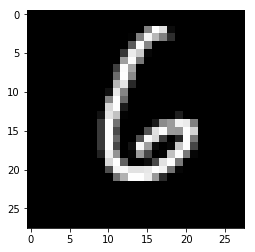

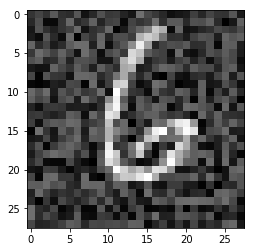

In [106]:
def show(img):
    plt.imshow(img, cmap="gray")
    plt.show()

test_img = x_train[np.random.randint(0,100)][:,:,0]

show(test_img)

mask = np.random.random(test_img.shape)
alpha = .7
mask = alpha*mask

temp = (mask + test_img)
temp = temp/np.max(temp)

show(temp)

# show(np.exp(temp*(1+test_img)))

# Look at Data

In [ ]:
for item in data_train.take(3):
    print(type(item))
    print(item[0].shape, item[1].shape)

In [ ]:
for sample in data_train.take(1):  # Only take a single example
    image, label = sample[0][0], sample[1][0]
    plt.imshow(image.numpy()[:, :, 0].astype(np.float32), cmap=plt.get_cmap("gray"))
    print("Label: %d" % label.numpy())

In [109]:
## THIS WORKS!
class MiniModel(tf.keras.Model):

    def __init__(self, kernel_size, num_classes):
        super(MiniModel, self).__init__(kernel_size,)
        
        self.kernel_size = kernel_size
        self.num_classes = num_classes
        
    def build(self, input_shapes):
        self.conv1 = tf.keras.layers.Conv2D(16, self.kernel_size)
        self.mp1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.bnrm1 = tf.keras.layers.BatchNormalization()
        self.conv2 = tf.keras.layers.Conv2D(16, self.kernel_size)
        self.mp2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.bnrm2 = tf.keras.layers.BatchNormalization()
        self.global_pool = tf.keras.layers.GlobalAveragePooling2D()
        self.classifier = tf.keras.layers.Dense(self.num_classes, activation='softmax')

    def call(self, inputs, training=False):

        x = self.conv1(inputs)
        x = self.mp1(x)
        x = self.bnrm1(x)
        x = self.conv2(x)
        x = self.mp2(x)
        x = self.bnrm2(x)
        x = self.global_pool(x)
        return self.classifier(x)

    
kernel_size = (3, 3)
# kernel_size = (9, 9)

# optimizer = tf.keras.optimizers.Adam(learning_rate=.01)
optimizer='adagrad'


model = MiniModel(kernel_size, 10)
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=optimizer, 
              metrics=['accuracy'])


        
        
        
# model = SimpleCNN().cnn

# model.fit(data_train, epochs=5)
# xx, yy = data_train.take(10000)

# model.fit_generator(data_train, epochs=3)
# model.fit(data_train, epochs=3)

model.fit(x_train, y_train, batch_size=32, epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 159us/sample - loss: 1.8868 - accuracy: 0.3814
Epoch 2/3
60000/60000 [==============================] - 9s 149us/sample - loss: 1.7258 - accuracy: 0.4730
Epoch 3/3
60000/60000 [==============================] - 9s 148us/sample - loss: 1.6497 - accuracy: 0.5128


In [ ]:
# for ii, item in enumerate(data_train):
#     if ii > 5:
#         break
#     print(type(item))
#     print(item[0].shape, item[1].shape)

for ii, (xx, yy) in enumerate(data_train):
    if ii > 5:
        break
    print(xx.shape, yy.shape)

In [ ]:
data_list = [xx, yy for (xx, yy) in data_train]
data_list[:3]
# xx.shape

In [115]:
class Foo(tf.keras.layers.Layer):
    def __init__(self, x):
        super(Foo, self).__init__()
        self.x = x
    
    def call(self, y):
        return self.x * y
    
foo = Foo(10)

foo(3)

<tf.Tensor: id=1029211, shape=(), dtype=int32, numpy=30>